# <center> Procesamiento de lenguaje natural (NLP)</center>
El [procesamiento de lenguaje natural](https://es.wikipedia.org/wiki/Procesamiento_de_lenguajes_naturales), abreviado PLN3 —en inglés, natural language processing, NLP— es un campo de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. Se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural, es decir, de las lenguas del mundo. No trata de la comunicación por medio de lenguas naturales de una forma abstracta, sino de diseñar mecanismos para comunicarse que sean eficaces computacionalmente —que se puedan realizar por medio de programas que ejecuten o simulen la comunicación—.


![elgif](https://media.giphy.com/media/xT0xeJpnrWC4XWblEk/giphy.gif)

NLP es considerado uno de los grandes retos de la inteligencia artificial ya que es una de las tareas más complicadas y desafiantes: ¿cómo comprender realmente el significado de un texto? ¿cómo intuir neologísmos, irónias, chistes ó poesía? Si la estrategia/algoritmo que utilizamos no sortea esas dificultades de nada nos servirán los resultados obtenidos.
En NLP no es suficiente con comprender meras palabras, se deberá comprender al conjunto de palabras que conforman una oración, y al conjunto de lineas que comprenden un párrafo. Dando un sentido global al análisis del texto/discurso para poder sacar buenas conclusiones.

Nuestro lenguaje está lleno de ambigüedades, de palabras con distintas acepciones, giros y diversos significados según el contexto. Esto hace que el NLP sea una de las tareas más difíciles de dominar.     

![madfalda](https://www.aprendemachinelearning.com/wp-content/uploads/2018/12/mafalda_mundo.png)

Por tanto, la dificultad del NLP está en varios niveles:

Ambigüedad:

- Nivel léxico: por ejemplo, varios significados
- Nivel referencial: anáforas, metáforas, etc...
- Nivel estructural: la semántica es necesaria para entender la estructura de una oración
- Nivel pragmático: dobles sentidos, ironía, humor
- Detección de espacios

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Los-datos" data-toc-modified-id="Los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Los datos</a></span><ul class="toc-item"><li><span><a href="#Conexiones-con-Mongo" data-toc-modified-id="Conexiones-con-Mongo-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conexiones con Mongo</a></span></li></ul></li><li><span><a href="#Nos-traemos-todos-los-datos-a-un-dataframe" data-toc-modified-id="Nos-traemos-todos-los-datos-a-un-dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nos traemos todos los datos a un dataframe</a></span></li><li><span><a href="#Limpiamos-un-poco-🧹" data-toc-modified-id="Limpiamos-un-poco-🧹-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Limpiamos un poco 🧹</a></span><ul class="toc-item"><li><span><a href="#Vamos-a-limpiarlo-con-Regex" data-toc-modified-id="Vamos-a-limpiarlo-con-Regex-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Vamos a limpiarlo con Regex</a></span></li><li><span><a href="#Vamos-a-crear-una-nueva-columna-limpia" data-toc-modified-id="Vamos-a-crear-una-nueva-columna-limpia-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Vamos a crear una nueva columna limpia</a></span></li></ul></li><li><span><a href="#NLP" data-toc-modified-id="NLP-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>NLP</a></span><ul class="toc-item"><li><span><a href="#Stop-Words" data-toc-modified-id="Stop-Words-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Stop Words</a></span></li><li><span><a href="#Tokenizar" data-toc-modified-id="Tokenizar-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tokenizar</a></span></li></ul></li><li><span><a href="#WordClouds" data-toc-modified-id="WordClouds-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>WordClouds</a></span><ul class="toc-item"><li><span><a href="#Generamos-un-WorCloud-de-una-canción" data-toc-modified-id="Generamos-un-WorCloud-de-una-canción-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generamos un WorCloud de una canción</a></span></li><li><span><a href="#También-podemos-generarlo-de-un-dataframe-entero" data-toc-modified-id="También-podemos-generarlo-de-un-dataframe-entero-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>También podemos generarlo de un dataframe entero</a></span></li></ul></li><li><span><a href="#Traducimos" data-toc-modified-id="Traducimos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Traducimos</a></span></li><li><span><a href="#Sentiment-analysis" data-toc-modified-id="Sentiment-analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sentiment analysis</a></span><ul class="toc-item"><li><span><a href="#TextBlob" data-toc-modified-id="TextBlob-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>TextBlob</a></span></li><li><span><a href="#NLTK" data-toc-modified-id="NLTK-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>NLTK</a></span></li><li><span><a href="#¿Os-acordáis-de-que-habíamos-hecho-una-función-que-tokenizaba?" data-toc-modified-id="¿Os-acordáis-de-que-habíamos-hecho-una-función-que-tokenizaba?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>¿Os acordáis de que habíamos hecho una función que tokenizaba?</a></span></li></ul></li></ul></div>

## Los datos
Nos los vamos a traer de una de nuestras bases de datos, en este caso MongoDB
### Conexiones con Mongo

In [1]:
from pymongo import MongoClient

In [2]:
# Con el comando MongoClient establecemos conexión con el servidor
client = MongoClient("localhost:27017")
db = client.get_database("spotify")
c = db.get_collection("canciones")

In [3]:
c.find_one({})

{'_id': ObjectId('60dca62a588aa56e4db94651'),
 'artista': 'Dominic Fike',
 'nombre': 'Phone Numbers',
 'ironhacker': 'ferqwertyuiop',
 'letra': "[Intro]\nCan you break bread with me?\nBreak bread with me, break, break\nCan you break bread with me?\nBreak bread with me\nWoah, Kenny\n\n[Chorus]\nWhy you not here with me?\nCan you break bread with me?\nWhy you switch phone numbers like clothes?\nWhy you can't answer me? (Yeah)\n'Cause I got more coming\nWhy you not here with me? (Why? Why?)\nCan you break bread with me? (Oh)\nWhy you switch phone numbers like clothes? (Uh)\nWhy you can't answer me? (Yeah, why?)\n'Cause I got more coming\n\n[Verse 1]\nYes, I moved my shawty from Florida to Hollywood\nBought some gold, shit look big on me\nGot some goals, it's a list on me\nYeah, lil' bitch, I'm rich off rock 'n' roll\nThe strippers and the strobe playin' tricks on me\nThe stones hittin' different, you supposed to be pissed at me (No)\nThey from Tiffany (Please)\nKeep my name out yo mouth l

In [4]:
# ¿Nos acordamos de cómo podemos ver una lista de las canciones?

In [5]:
c.find_one({}).keys()

dict_keys(['_id', 'artista', 'nombre', 'ironhacker', 'letra'])

In [7]:
#c.distinct("nombre")

## Nos traemos todos los datos a un dataframe

In [8]:
import pandas as pd

In [14]:
c.find({})
#recordad que .find devuelve un cursor

In [9]:
df = pd.DataFrame(list(c.find({})))
df.head()

,_id,artista,nombre,ironhacker,letra
0,60dca62a588aa56e4db94651,Dominic Fike,Phone Numbers,ferqwertyuiop,[Intro]\nCan you break bread with me?\nBreak b...
1,60dca62a588aa56e4db94652,Renaldo & Clara,L'amor fa calor,ferqwertyuiop,Oh oh l'amor oh oh fa calor oh oh\nOh oh l'amo...
2,60dca62a588aa56e4db94653,rusowsky,So So,ferqwertyuiop,[Intro]\nWhy is it hard on my own though\nWhy ...
3,60dca62a588aa56e4db94654,Hocus Pocus,Hip Hop ?,ferqwertyuiop,"[Intro]\nThat's what it is, uh huh\nNick Wiz, ..."
4,60dca62a588aa56e4db94655,La Fúmiga,Primera conjugació,soyungalgo,Se desplazo mi centro de gravedad\nYa no soy l...


In [10]:
df.shape

(147, 5)

## Limpiamos un poco 🧹

In [15]:
import re

In [19]:
lisistrata = c.find_one({"nombre": "Lisístrata"})["letra"]
#print(lisistrata)

### Vamos a limpiarlo con Regex

In [20]:
pat = "\[(.*?)\]"

In [22]:
ejemplo = "[hacemos] un ejemplo"
sin_corchetes = re.sub(pat,"", ejemplo)
sin_corchetes

' un ejemplo'

### Vamos a crear una nueva columna limpia

In [24]:
def quitar_corchetes(string):
    pat = "\[(.*?)\]"
    sin_corchetes = re.sub(pat,"", string)
    return sin_corchetes

In [25]:
df["letra"] = df.letra.apply(quitar_corchetes)
df.head()

,_id,artista,nombre,ironhacker,letra
0,60dca62a588aa56e4db94651,Dominic Fike,Phone Numbers,ferqwertyuiop,\nCan you break bread with me?\nBreak bread wi...
1,60dca62a588aa56e4db94652,Renaldo & Clara,L'amor fa calor,ferqwertyuiop,Oh oh l'amor oh oh fa calor oh oh\nOh oh l'amo...
2,60dca62a588aa56e4db94653,rusowsky,So So,ferqwertyuiop,\nWhy is it hard on my own though\nWhy am I no...
3,60dca62a588aa56e4db94654,Hocus Pocus,Hip Hop ?,ferqwertyuiop,"\nThat's what it is, uh huh\nNick Wiz, turn my..."
4,60dca62a588aa56e4db94655,La Fúmiga,Primera conjugació,soyungalgo,Se desplazo mi centro de gravedad\nYa no soy l...


## NLP

### Stop Words

Palabras vacías es el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos en lenguaje natural.

In [26]:
df.head()

,_id,artista,nombre,ironhacker,letra
0,60dca62a588aa56e4db94651,Dominic Fike,Phone Numbers,ferqwertyuiop,\nCan you break bread with me?\nBreak bread wi...
1,60dca62a588aa56e4db94652,Renaldo & Clara,L'amor fa calor,ferqwertyuiop,Oh oh l'amor oh oh fa calor oh oh\nOh oh l'amo...
2,60dca62a588aa56e4db94653,rusowsky,So So,ferqwertyuiop,\nWhy is it hard on my own though\nWhy am I no...
3,60dca62a588aa56e4db94654,Hocus Pocus,Hip Hop ?,ferqwertyuiop,"\nThat's what it is, uh huh\nNick Wiz, turn my..."
4,60dca62a588aa56e4db94655,La Fúmiga,Primera conjugació,soyungalgo,Se desplazo mi centro de gravedad\nYa no soy l...


In [27]:
df.isnull().sum()

_id           0
artista       0
nombre        0
ironhacker    0
letra         0
dtype: int64

In [ ]:
#! pip install spacy

In [28]:
import string
import spacy

[Documentación Spacy](https://spacy.io/api/doc/)

### Tokenizar
Una de las formas de normalizar nuestros tokens es mediante stemming y lemmatization.
El stemming consiste en quitar y reemplazar sufijos de la raíz de la palabra. La lemmatización es un poco más compleja e implica hacer un análisis del vocabulario y su morfología para retornar la forma básica de la palabra (sin conjugar, en singular, etc).    
Leed [este](https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8) interesante artículo.
**Meter DOC spacy**

In [33]:
nlp = spacy.load("en_core_web_sm")
nlp_es=spacy.load('es_core_news_sm')

In [35]:
prueba = nlp(df.loc[0]["letra"])

In [47]:
prueba[2]

you

In [48]:
prueba[2].is_stop

True

In [49]:
prueba


Can you break bread with me?
Break bread with me, break, break
Can you break bread with me?
Break bread with me
Woah, Kenny


Why you not here with me?
Can you break bread with me?
Why you switch phone numbers like clothes?
Why you can't answer me? (Yeah)
'Cause I got more coming
Why you not here with me? (Why? Why?)
Can you break bread with me? (Oh)
Why you switch phone numbers like clothes? (Uh)
Why you can't answer me? (Yeah, why?)
'Cause I got more coming


Yes, I moved my shawty from Florida to Hollywood
Bought some gold, shit look big on me
Got some goals, it's a list on me
Yeah, lil' bitch, I'm rich off rock 'n' roll
The strippers and the strobe playin' tricks on me
The stones hittin' different, you supposed to be pissed at me (No)
They from Tiffany (Please)
Keep my name out yo mouth like some wisdom teeth
(And you wonder why) Why I'm not there with you
(I ain't answered my phone in so long)


Why you not here with me?
Can you break bread with me?
Why you switch phone numbers l

In [32]:
from langdetect import detect
# Módulo que reconoce los idiomas en un texto

Vamos a escribir una función que va a tokenizar las letras de nuestras canciones sin importar si están en castellano o en inglés

In [52]:
def tokenizer(txt):
    try:
        
        if detect(txt) == "en": #si el texto está en inglés...
            nlp = spacy.load("en_core_web_sm")
        
        elif detext(txt) == "es": #si el texto está en castellano....
            nlp =  spacy.load('es_core_news_sm')
            
        else:
            return "no es castellano ni inglés"
        
    except: 
        return "No puedo analizarlo"
        

    tokens = nlp(txt)
    filter_tokens = []
    
    for word in tokens:
        if not word.is_stop:
            lemma = word.lemma_.lower().strip()
            if re.search("^[a-zA-Z]+$", lemma):
                filter_tokens.append(lemma)
            
    return " ".join(filter_tokens)

In [57]:
tokenizer("hola qué tal estás")

'No puedo analizarlo'

In [53]:
tokenizer(df.loc[0]["letra"])

'break bread break bread break break break bread break bread woah kenny break bread switch phone number like clothe answer yeah get come break bread oh switch phone number like clothe uh answer yeah get come yes move shawty florida hollywood buy gold shit look big got goal list yeah lil bitch rich rock n roll stripper strobe playin trick stone hittin different suppose piss tiffany yo mouth like wisdom tooth wonder ai answer phone long break bread switch phone number like clothe answer yeah get come break bread switch phone number like clothe answer yeah get come break bread break break bread yeah okay break break break bread break bread huh break bread yes move lil shawty round business late get rich goddamn fast want bread catch break yes know tired hatin tired starin face bitch retaliate tit tat today momma big sean lil fla la tryna shit shake tryna wrap case ho k magistrate parent sake talkin sharing cake shut fuck break bread switch phone number like clothe answer yeah get come bre

In [56]:
df["tokens"] = df.letra.apply(tokenizer)

In [58]:
df.head()

,_id,artista,nombre,ironhacker,letra,tokens
0,60dca62a588aa56e4db94651,Dominic Fike,Phone Numbers,ferqwertyuiop,\nCan you break bread with me?\nBreak bread wi...,break bread break bread break break break brea...
1,60dca62a588aa56e4db94652,Renaldo & Clara,L'amor fa calor,ferqwertyuiop,Oh oh l'amor oh oh fa calor oh oh\nOh oh l'amo...,No puedo analizarlo
2,60dca62a588aa56e4db94653,rusowsky,So So,ferqwertyuiop,\nWhy is it hard on my own though\nWhy am I no...,hard like bit curtain come curtain come end wi...
3,60dca62a588aa56e4db94654,Hocus Pocus,Hip Hop ?,ferqwertyuiop,"\nThat's what it is, uh huh\nNick Wiz, turn my...",uh huh nick wiz turn headphone man uh uh ayo m...
4,60dca62a588aa56e4db94655,La Fúmiga,Primera conjugació,soyungalgo,Se desplazo mi centro de gravedad\nYa no soy l...,No puedo analizarlo


Comprobamos que funciona pasándole una letra a la función

## WordClouds
Una nube de palabras o nube de etiquetas es una representación visual de las palabras que conforman un texto, en donde el tamaño es mayor para las palabras que aparecen con más frecuencia

![wordcloud](https://i.imgur.com/8I8aJ1N.png)

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

### Generamos un WorCloud de una canción

In [60]:
def wordcloud(df,row,col):
    wordcloud= WordCloud(width=1600,
                        height=400).generate(df.loc[row][col])
    
    plt.figure(figsize=(15,10), facecolor="k")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig("images/wordcloud.png", facecolor="k", bbox_inches="tight")
    plt.show();

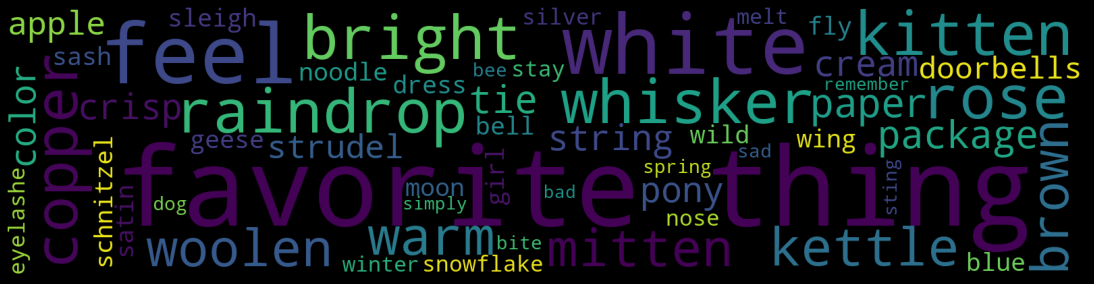

In [62]:
wordcloud(df,8,"tokens")

In [64]:
df.loc[8]["ae"]

'Favorite Things'

### También podemos generarlo de un dataframe entero

## Traducimos
Un poco a nuestro pesar, aunque hay librerías que funcionan en Castellano (la parte de Spacy entrenada en castellano funciona muy bien), lo cierto es que funcionan mejor en inglés, en general, hay otras librerías que no son tan exactas y aún así incluso Spacy funciona mejor en inglés, así que vamos a traducir las letras.     
La librería TextBlob, que vamos a usar más adelante para hacer análisis de sentimientos también traduce, pero mejor vamos a utilizar googletrans y su librería, ojo al instalarla:      
`pip install googletrans==3.1.0a0`      
Hay que instalar la versión alfa que la oficial tiene issues.
Creamos una columna en el dataframe con todas las letras traducidas, y dejamos la original también, por si la necesitáramos.

In [ ]:
from googletrans import Translator

In [ ]:
# Vemos cómo traducir una frase


De nuevo seguimos con la tónica de automatizar y hacer funciones para todo y así poder reutilizar código

## Sentiment analysis
### TextBlob
`TextBlob(the_string).sentiment`      

**Argumentos:** `string`<br>
**Devuelve:** `polaridad`& `subjetividad`


La propiedad de sentimiento devuelve una tupla con nombre de la forma Sentimiento(polaridad, subjetividad). La puntuación de la polaridad es un float dentro del rango [-1,0, 1,0]. La subjetividad es un float dentro del rango [0.0, 1.0] donde 0.0 es muy objetivo y 1.0 es muy subjetivo.

TextBlob se apoya en dos librerías, NLTK y pattern, os dejo laa [documentación](https://textblob.readthedocs.io/en/dev/)


### NLTK
El kit de herramientas de lenguaje natural, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural simbólico y estadísticos para el lenguaje de programación Python. NLTK incluye demostraciones gráficas y datos de muestra.

En este caso vamos a sacar también la polaridad con el módulo [SentimentIntensityAnalizer](https://www.nltk.org/api/nltk.sentiment.html#module-nltk.sentiment.vader)      

`sia.polarity_scores(the_string)`

**Arumentoss:** `string`<br>
**Devuelve:** `polaridad`

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Información sobre el [compound](https://github.com/cjhutto/vaderSentiment#about-the-scoring)     
Es la suma de las puntuaciones normalizada entre -1 y 1

### ¿Os acordáis de que habíamos hecho una función que tokenizaba?

In [ ]:
import plotly.express as px
import plotly.graph_objects as go